In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [6]:
monthly_return = np.genfromtxt ('monthly_return.csv', delimiter=",")
equal_weight_test = np.genfromtxt ('monthly_return_equal_year.csv', delimiter=",")
mean_variance_test = np.genfromtxt('monthly_return_year.csv', delimiter = ",")
x_optimal_year = np.genfromtxt('x_optimal_year.csv', delimiter = ",")

In [12]:
print(monthly_return.shape)
print(equal_weight_test.shape)
print(mean_variance_test.shape)
print(x_optimal_year[:,0].reshape((556, 1)).shape)

(360, 556)
(12, 25)
(12, 25)
(556, 1)


In [32]:
mean_variance_train_return = [np.dot(monthly_return[i*12:(i+5)*12,:], x_optimal_year[:,i].reshape((556, 1))) for i in range(25)]
equal_weight_train_return = [np.dot(monthly_return[i*12:(i+5)*12,:], 1./556.*np.ones((556,1))) for i in range(25)]
#print(train_return[0].shape)
mean_variance_train_m = [mean_variance_train_return[i].mean() for i in range(25)]
equal_weight_train_m = [equal_weight_train_return[i].mean() for i in range(25)]
print (len(mean_variance_train_m))
print (len(equal_weight_train_m))


25
25


In [12]:
m_equal_25 = return_equal_yearly.mean()
m_equal_5 = [return_equal_yearly[:,i*5:(i+1)*5].mean() for i in range(5)]
sigma_equal_25 = return_equal_yearly.std()
sigma_equal_5 = [return_equal_yearly[:,i*5:(i+1)*5].std() for i in range(5)]
s_equal_25 = m_equal_25/sigma_equal_25
s_equal_5 = [m_equal_5[i]/sigma_equal_5[i] for i in range(5)]

In [13]:
print(m_equal_25)
print(sigma_equal_25)
print(s_equal_25)
print(m_equal_5)
print(sigma_equal_5)
print(s_equal_5)

0.01392133
0.0429049443196
0.324469131024
[0.019632450000000003, 0.015115450000000001, 0.015022983333333332, 0.010116433333333332, 0.009719333333333335]
[0.02757863227477933, 0.038996474195079484, 0.040995205953660678, 0.061207800248107451, 0.037795146331536043]
[0.71187177828082093, 0.3876106830680412, 0.36645707672050004, 0.16528013247210485, 0.25715824058666448]


In [14]:
m_3factor_25 = return_3factor_yearly.mean()
m_3factor_5 = [return_3factor_yearly[:,i*5:(i+1)*5].mean() for i in range(5)]
sigma_3factor_25 = return_3factor_yearly.std()
sigma_3factor_5 = [return_3factor_yearly[:,i*5:(i+1)*5].std() for i in range(5)]
s_3factor_25 = m_3factor_25/sigma_3factor_25
s_3factor_5 = [m_3factor_5[i]/sigma_3factor_5[i] for i in range(5)]

In [15]:
print(m_3factor_25)
print(sigma_3factor_25)
print(s_3factor_25)
print(m_3factor_5)
print(sigma_3factor_5)
print(s_3factor_5)

0.01727838
0.0468026318853
0.369175392579
[0.028860683333333335, 0.01688478333333333, 0.018945333333333331, 0.011701733333333334, 0.0099993666666666672]
[0.040033419899916815, 0.045394665743194854, 0.045329783677205235, 0.060747765008233479, 0.036370794643489565]
[0.72091476085442563, 0.37195522991298907, 0.41794449027693636, 0.19262821161811194, 0.27492846292420975]


In [16]:
# cumulative valur plot
value_equal = np.append([1], np.cumprod([np.product(return_equal_yearly[:,i] + 1) for i in range(25)]))
value_3factor = np.append([1], np.cumprod([np.product(return_3factor_yearly[:,i] + 1)-0.01 for i in range(25)]))
value_josiah_Mean_variance = np.append([1], np.cumprod([np.product(josiah_Mean_variance[:,i] + 1) for i in range(25)]))
value_josiah_Three_Factor = np.append([1], np.cumprod([np.product(josiah_Three_Factor[:,i] + 1) for i in range(25)]))
value_josiah_Five_Factor = np.append([1], np.cumprod([np.product(josiah_Five_Factor[:,i] + 1) for i in range(25)]))
value_zhenyuan_mean_variance = np.append([1], np.cumprod([np.product(zhenyuan_mean_variance[:,i] + 1) for i in range(25)]))
value_bond = np.append([1], value_bond)

In [17]:
print(value_equal)
print(value_bond)
print(value_3factor)
print(value_josiah_Mean_variance)
#print(value_zhenyuan_mean_variance)
print(value_josiah_Three_Factor)
print(value_josiah_Five_Factor)

[  1.           1.45340551   1.8357727    2.3025065    2.34968305
   3.14124211   3.94617457   5.32639921   5.57186485   6.05769723
   7.38502226   8.67308531   8.47542764  12.36350493  15.36084318
  17.18885094  20.7885842   21.94188821  14.86684916  21.94025906
  28.07614451  28.50581651  33.99420538  46.11222163  50.40723929
  48.09606539]
[  1.           1.18195007   1.32980924   1.63529831   1.62782021
   1.95546418   2.28594644   3.15710882   3.64964384   3.57455979
   4.13828335   4.82844015   5.07336985   7.26509311  11.41362742
  11.48387723  13.85423394  14.66954065  11.46259609  12.15412015
  14.17768933  15.81451609  18.71382898  23.4957329   25.18737725
  28.43354016]
[   1.            1.64516653    2.26764256    3.57929762    3.81809586
    5.08189266    6.39089516    8.93742461    9.37512024   10.05185108
   12.51978887   15.13474566   14.37793728   24.11342837   31.86647605
   34.87125113   43.02826599   46.68499792   29.85982691   45.47798982
   59.837455     62.439954

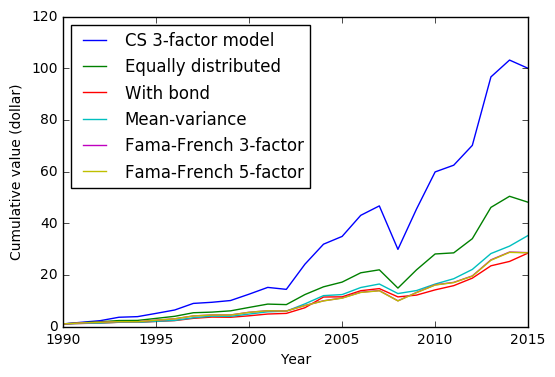

In [24]:
plt.plot(range(1990, 2016), value_3factor, label="CS 3-factor model")
plt.plot(range(1990, 2016), value_equal, label = "Equally distributed")
plt.plot(range(1990, 2016), value_bond, label = "With bond")
plt.plot(range(1990, 2016), value_josiah_Mean_variance, label = "Mean-variance")
#plt.plot(range(1990, 2016),value_zhenyuan_mean_variance, label = "Mean-variance")
plt.plot(range(1990, 2016), value_josiah_Three_Factor, label = "Fama-French 3-factor")
plt.plot(range(1990, 2016), value_josiah_Five_Factor, label = "Fama-French 5-factor")
#print monthly_return_year.mean(axis = 0) - monthly_return_equal_year.mean(axis = 0)
plt.legend(loc = 2)
plt.ylabel('Cumulative value (dollar)')
plt.xlabel('Year')
plt.xlim((1990, 2015))
plt.ylim((0, 120))
plt.savefig('cumulative_value.jpg', dpi=600)
plt.show()
plt.close("all")